  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="Middle">
                <font size=25px>
                    <b>  Detection of fundus diseases in retinal photoscans using Multi image classification deep neural networks
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
The problem of detection of disease and condition to the fundus of an eye is done after multiple consultation. Due to the nature of fundus many issues of fundus be easily undiagnosed.

# Data Definition:

*Here the dataset consist of 1000 images of photoretinal scans of Fundus of an eye.

*In which it spans of 38 diseases and normal classes.

# Content

**[1. Import Python modules](#1)**<br>
**[2. Load dataset dictionary](#2)**<br>&emsp;
**[2.1. Image Dictionary](#2.1)**<br>&emsp;
**[2.2. Label Dictionary](#2.2)**<br>
**[3. Importing and resizing the images in to Tensor](#3)**<br>&emsp;
**[3.1. Saving the tensor for future imports](#3.1)**<br>&emsp;
**[3.2. Loading the image Tensors](#3.2)**<br>&emsp;
**[3.3. Converting the Tensor list into Array](#3.3)**<br>
**[4. Train test split the X and Y Data](#4)**<br>&emsp;
**[4.1. Scalling the X data array to 255 so the training will be the pixel range ](#4.1)**<br>
**[5. Building the Model](#5)**<br>&emsp;
**[5.1. Downloading the Pre-Trained model Mobilenet_v2](#5.1)**<br>
**[6. Model Training](#6)**<br>&emsp;
**[6.1. Saving the Trained model](#6.1)**<br>
**[7. Model Evaluation](#7)**<br>
**[8. Prediction of single image](#8)**<br>



<a id='1'></a>
## 1. Import Python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import joblib
import pickle

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

* Directory control

In [2]:
#pwd
os.getcwd( )
#os.chdir('desired filepath here') 

'e:\\DS workspace\\ML DL Python\\aca tor dataset\\1000 images eye - Medical\\1000 image notebook'

* list of directories for the Fundus diseases

In [3]:
diseases = os.listdir(r"E:\DS workspace\ML DL Python\aca tor dataset\1000 images eye - Medical\Dataset\1000images")
diseases

['0.0.Normal',
 '0.1.Tessellated fundus',
 '0.2.Large optic cup',
 '0.3.DR1',
 '1.0.DR2',
 '1.1.DR3',
 '10.0.Possible glaucoma',
 '10.1.Optic atrophy',
 '11.Severe hypertensive retinopathy',
 '12.Disc swelling and elevation',
 '13.Dragged Disc',
 '14.Congenital disc abnormality',
 '15.0.Retinitis pigmentosa',
 '15.1.Bietti crystalline dystrophy',
 '16.Peripheral retinal degeneration and break',
 '17.Myelinated nerve fiber',
 '18.Vitreous particles',
 '19.Fundus neoplasm',
 '2.0.BRVO',
 '2.1.CRVO',
 '20.Massive hard exudates',
 '21.Yellow-white spots-flecks',
 '22.Cotton-wool spots',
 '23.Vessel tortuosity',
 '24.Chorioretinal atrophy-coloboma',
 '25.Preretinal hemorrhage',
 '26.Fibrosis',
 '27.Laser Spots',
 '28.Silicon oil in eye',
 '29.0.Blur fundus without PDR',
 '29.1.Blur fundus with suspected PDR',
 '3.RAO',
 '4.Rhegmatogenous RD',
 '5.0.CSCR',
 '5.1.VKH disease',
 '6.Maculopathy',
 '7.ERM',
 '8.MH',
 '9.Pathological myopia']

* Defining Image width and height

In [4]:
IMAGE_WIDTH= 224
IMAGE_HEIGHT= 224

<a id='2'></a>
## 2. Load dataset dictionary

In [5]:
import pathlib
data_dir = pathlib.Path(r"E:\DS workspace\ML DL Python\aca tor dataset\1000 images eye - Medical\Dataset\1000images")
data_dir
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('E:/DS workspace/ML DL Python/aca tor dataset/1000 images eye - Medical/Dataset/1000images/0.0.Normal/1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG'),
 WindowsPath('E:/DS workspace/ML DL Python/aca tor dataset/1000 images eye - Medical/Dataset/1000images/0.0.Normal/1ffa9628-8d87-11e8-9daf-6045cb817f5b..JPG'),
 WindowsPath('E:/DS workspace/ML DL Python/aca tor dataset/1000 images eye - Medical/Dataset/1000images/0.0.Normal/1ffa9629-8d87-11e8-9daf-6045cb817f5b..JPG'),
 WindowsPath('E:/DS workspace/ML DL Python/aca tor dataset/1000 images eye - Medical/Dataset/1000images/0.0.Normal/1ffa962a-8d87-11e8-9daf-6045cb817f5b..JPG'),
 WindowsPath('E:/DS workspace/ML DL Python/aca tor dataset/1000 images eye - Medical/Dataset/1000images/0.0.Normal/1ffa962b-8d87-11e8-9daf-6045cb817f5b..JPG')]

In [6]:
filepaths = list(data_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

<a id='2.1'></a>
### 2.1. Image dictionary

In [7]:
diseases_image_dict = {
 '0.0.Normal': list(data_dir.glob('0.0.Normal/*')),
 '0.1.Tessellated fundus': list(data_dir.glob('0.1.Tessellated fundus/*')),
 '0.2.Large optic cup': list(data_dir.glob('0.2.Large optic cup/*')),
 '0.3.DR1': list(data_dir.glob('0.3.DR1/*')),
 '1.0.DR2': list(data_dir.glob('1.0.DR2/*')),
 '1.1.DR3': list(data_dir.glob('1.1.DR3/*')),
 '10.0.Possible glaucoma': list(data_dir.glob('10.0.Possible glaucoma/*')),
 '10.1.Optic atrophy': list(data_dir.glob('10.1.Optic atrophy/*')),
 '11.Severe hypertensive retinopathy': list(data_dir.glob('11.Severe hypertensive retinopathy/*')),
 '12.Disc swelling and elevation': list(data_dir.glob('12.Disc swelling and elevation/*')),
 '13.Dragged Disc': list(data_dir.glob('13.Dragged Disc/*')),
 '14.Congenital disc abnormality': list(data_dir.glob('14.Congenital disc abnormality/*')),
 '15.0.Retinitis pigmentosa': list(data_dir.glob('15.0.Retinitis pigmentosa/*')),
 '15.1.Bietti crystalline dystrophy': list(data_dir.glob('15.1.Bietti crystalline dystrophy/*')),
 '16.Peripheral retinal degeneration and break' : list(data_dir.glob('16.Peripheral retinal degeneration and break/*')),
 '17.Myelinated nerve fiber': list(data_dir.glob('17.Myelinated nerve fiber/*')),
 '18.Vitreous particles': list(data_dir.glob('18.Vitreous particles/*')),
 '19.Fundus neoplasm': list(data_dir.glob('19.Fundus neoplasm/*')),
 '2.0.BRVO': list(data_dir.glob('2.0.BRVO/*')),
 '2.1.CRVO': list(data_dir.glob('2.1.CRVO/*')),
 '20.Massive hard exudates': list(data_dir.glob('20.Massive hard exudates/*')),
 '21.Yellow-white spots-flecks': list(data_dir.glob('21.Yellow-white spots-flecks/*')),
 '22.Cotton-wool spots': list(data_dir.glob('22.Cotton-wool spots/*')),
 '23.Vessel tortuosity': list(data_dir.glob('23.Vessel tortuosity/*')),
 '24.Chorioretinal atrophy-coloboma': list(data_dir.glob('24.Chorioretinal atrophy-coloboma/*')),
 '25.Preretinal hemorrhage': list(data_dir.glob('25.Preretinal hemorrhage/*')),
 '26.Fibrosis': list(data_dir.glob('26.Fibrosis/*')),
 '27.Laser Spots': list(data_dir.glob('27.Laser Spots/*')),
 '28.Silicon oil in eye': list(data_dir.glob('28.Silicon oil in eye/*')),
 '29.0.Blur fundus without PDR': list(data_dir.glob('29.0.Blur fundus without PDR/*')),
 '29.1.Blur fundus with suspected PDR': list(data_dir.glob('29.1.Blur fundus with suspected PDR/*')),
 '3.RAO': list(data_dir.glob('3.RAO/*')),
 '4.Rhegmatogenous RD': list(data_dir.glob('4.Rhegmatogenous RD/*')),
 '5.0.CSCR': list(data_dir.glob('5.0.CSCR/*')),
 '5.1.VKH disease': list(data_dir.glob('5.1.VKH disease/*')),
 '6.Maculopathy': list(data_dir.glob('6.Maculopathy/*')),
 '7.ERM': list(data_dir.glob('7.ERM/*')),
 '8.MH': list(data_dir.glob('8.MH/*')),
 '9.Pathological myopia': list(data_dir.glob('9.Pathological myopia/*'))
 }

<a id='2.2'></a>
### 2.2. Label dictionary

In [8]:
diseases_label_dict = {
'0.0.Normal':0,
'0.1.Tessellated fundus':1,
'0.2.Large optic cup':2,
'0.3.DR1':3,
'1.0.DR2':4,
'1.1.DR3':5,
'10.0.Possible glaucoma':6,
'10.1.Optic atrophy':7,
'11.Severe hypertensive retinopathy':8,
'12.Disc swelling and elevation':9,
'13.Dragged Disc':10,
'14.Congenital disc abnormality':11,
'15.0.Retinitis pigmentosa':12,
'15.1.Bietti crystalline dystrophy':13,
'16.Peripheral retinal degeneration and break':14,
'17.Myelinated nerve fiber':15,
'18.Vitreous particles':16,
'19.Fundus neoplasm':17,
'2.0.BRVO':18,
'2.1.CRVO':19,
'20.Massive hard exudates':20,
'21.Yellow-white spots-flecks':21,
'22.Cotton-wool spots':22,
'23.Vessel tortuosity':23,
'24.Chorioretinal atrophy-coloboma':24,
'25.Preretinal hemorrhage':25,
'26.Fibrosis':26,
'27.Laser Spots':27,
'28.Silicon oil in eye':28,
'29.0.Blur fundus without PDR':29,
'29.1.Blur fundus with suspected PDR':30,
'3.RAO':31,
'4.Rhegmatogenous RD':32,
'5.0.CSCR':33,
'5.1.VKH disease':34,
'6.Maculopathy':35,
'7.ERM':36,
'8.MH':37,
'9.Pathological myopia':38
}

<a id='3'></a>
## 3. Importing and resizing the images in to Tensor

In [10]:
X, Y = [], []

for diseases_name, images in diseases_image_dict.items():
    print(diseases_name)
    for image in tqdm(images):
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(diseases_label_dict[diseases_name])
        else:
            #print("Invalid Image")
            continue

0.0.Normal


100%|██████████| 38/38 [00:07<00:00,  5.16it/s]


0.1.Tessellated fundus


100%|██████████| 13/13 [00:02<00:00,  6.45it/s]


0.2.Large optic cup


100%|██████████| 50/50 [00:06<00:00,  8.03it/s]


0.3.DR1


100%|██████████| 18/18 [00:03<00:00,  5.44it/s]


1.0.DR2


100%|██████████| 49/49 [00:08<00:00,  5.96it/s]


1.1.DR3


100%|██████████| 39/39 [00:06<00:00,  5.85it/s]


10.0.Possible glaucoma


100%|██████████| 13/13 [00:01<00:00,  6.85it/s]


10.1.Optic atrophy


100%|██████████| 12/12 [00:01<00:00,  6.70it/s]


11.Severe hypertensive retinopathy


100%|██████████| 15/15 [00:01<00:00,  7.68it/s]


12.Disc swelling and elevation


100%|██████████| 13/13 [00:01<00:00,  9.67it/s]


13.Dragged Disc


100%|██████████| 10/10 [00:01<00:00,  8.81it/s]


14.Congenital disc abnormality


100%|██████████| 10/10 [00:01<00:00,  8.35it/s]


15.0.Retinitis pigmentosa


100%|██████████| 22/22 [00:02<00:00,  8.57it/s]


15.1.Bietti crystalline dystrophy


100%|██████████| 8/8 [00:00<00:00,  8.09it/s]


16.Peripheral retinal degeneration and break


100%|██████████| 14/14 [00:02<00:00,  6.58it/s]


17.Myelinated nerve fiber


100%|██████████| 11/11 [00:01<00:00, 10.68it/s]


18.Vitreous particles


100%|██████████| 14/14 [00:01<00:00,  9.84it/s]


19.Fundus neoplasm


100%|██████████| 8/8 [00:00<00:00, 11.98it/s]


2.0.BRVO


100%|██████████| 44/44 [00:06<00:00,  6.63it/s]


2.1.CRVO


100%|██████████| 22/22 [00:02<00:00, 10.20it/s]


20.Massive hard exudates


100%|██████████| 13/13 [00:01<00:00, 10.60it/s]


21.Yellow-white spots-flecks


100%|██████████| 29/29 [00:04<00:00,  6.78it/s]


22.Cotton-wool spots


100%|██████████| 10/10 [00:01<00:00,  6.36it/s]


23.Vessel tortuosity


100%|██████████| 14/14 [00:02<00:00,  6.38it/s]


24.Chorioretinal atrophy-coloboma


100%|██████████| 15/15 [00:01<00:00,  8.84it/s]


25.Preretinal hemorrhage


100%|██████████| 10/10 [00:01<00:00,  8.27it/s]


26.Fibrosis


100%|██████████| 10/10 [00:01<00:00,  7.55it/s]


27.Laser Spots


100%|██████████| 20/20 [00:02<00:00,  7.04it/s]


28.Silicon oil in eye


100%|██████████| 19/19 [00:02<00:00,  9.05it/s]


29.0.Blur fundus without PDR


100%|██████████| 114/114 [00:11<00:00,  9.51it/s]


29.1.Blur fundus with suspected PDR


100%|██████████| 45/45 [00:04<00:00,  9.34it/s]


3.RAO


100%|██████████| 16/16 [00:01<00:00,  9.31it/s]


4.Rhegmatogenous RD


100%|██████████| 57/57 [00:08<00:00,  6.67it/s]


5.0.CSCR


100%|██████████| 14/14 [00:02<00:00,  6.93it/s]


5.1.VKH disease


100%|██████████| 14/14 [00:01<00:00,  7.57it/s]


6.Maculopathy


100%|██████████| 74/74 [00:11<00:00,  6.38it/s]


7.ERM


100%|██████████| 26/26 [00:03<00:00,  7.66it/s]


8.MH


100%|██████████| 23/23 [00:03<00:00,  6.24it/s]


9.Pathological myopia


100%|██████████| 54/54 [00:09<00:00,  6.00it/s]


<a id='3.1'></a>
###  3.1. Saving the tensor for future imports

In [11]:
np.save(r"E:\\DS workspace\\ML DL Python\\aca tor dataset\\1000 images eye - Medical\\1000 image notebook\\X224.npy",X)
np.save(r"E:\\DS workspace\\ML DL Python\\aca tor dataset\\1000 images eye - Medical\\1000 image notebook\\Y224.npy",Y)

<a id='3.2'></a>
### 3.2. Loading the image Tensors

In [12]:
#np.save("X.npy",X)
#np.save("Y.npy",Y)
X = np.load(r"E:\\DS workspace\\ML DL Python\\aca tor dataset\\1000 images eye - Medical\\1000 image notebook\\X224.npy").tolist()
Y = np.load(r"E:\\DS workspace\\ML DL Python\\aca tor dataset\\1000 images eye - Medical\\1000 image notebook\\Y224.npy").tolist()

<a id='3.3'></a>
### 3.3. Converting the Tensor list into Array

In [13]:
X = np.array(X)
Y = np.array(Y)

<a id='4'></a>
## 4. Train test split the X and Y Data

* X = image (tensor)
* Y = Label (Disease)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=0)

print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

700 700
300 300
(700, 224, 224, 3) (700,)
(300, 224, 224, 3) (300,)


<a id='4.1'></a>
### 4.1. Scalling the X data array to 255 so the training will be the pixel range 

In [15]:
X_train_scalled = X_train / 255
X_test_scalled = X_test / 255

<a id='5'></a>
## 5. Building the Model

<a id='5.1'></a>
### 5.1. Downloading the Pre-Trained model Mobilenet_v2

* Pre-Trained model = Mobilenet_v2
* input shape = (224,224,3)
* Trainable = False

In [16]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224, 3), trainable=False)

* Mobilenet_v2 = (224,224,3)
* Flatten
* Dense(54)
* Dropout(0.2)
* Dense(39)

In [17]:
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(224, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(39, activation='sigmoid')
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 224)               286944    
                                                                 
 dropout (Dropout)           (None, 224)               0         
                                                                 
 dense_1 (Dense)             (None, 39)                8775      
                                                                 
Total params: 2,553,703
Trainable params: 295,719
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])

<a id='6'></a>
## 6. Model Training

In [19]:
model.fit(X_train_scalled, Y_train, validation_data= (X_test_scalled, Y_test), epochs=10)

Epoch 1/10
22/22 [==============================] - 34s 1s/step - loss: 3.0065 - acc: 0.2643 - val_loss: 2.4975 - val_acc: 0.3500
Epoch 2/10
22/22 [==============================] - 23s 1s/step - loss: 1.9934 - acc: 0.4514 - val_loss: 2.0198 - val_acc: 0.4733
Epoch 3/10
22/22 [==============================] - 23s 1s/step - loss: 1.4642 - acc: 0.6000 - val_loss: 1.8506 - val_acc: 0.4833
Epoch 4/10
22/22 [==============================] - 24s 1s/step - loss: 1.1677 - acc: 0.6829 - val_loss: 1.5862 - val_acc: 0.5500
Epoch 5/10
22/22 [==============================] - 22s 1s/step - loss: 0.9109 - acc: 0.7600 - val_loss: 1.4378 - val_acc: 0.5533
Epoch 6/10
22/22 [==============================] - 26s 1s/step - loss: 0.7105 - acc: 0.8100 - val_loss: 1.3611 - val_acc: 0.5967
Epoch 7/10
22/22 [==============================] - 23s 1s/step - loss: 0.6230 - acc: 0.8457 - val_loss: 1.2641 - val_acc: 0.6067
Epoch 8/10
22/22 [==============================] - 22s 995ms/step - loss: 0.5304 - acc: 0

<a id='6.1'></a>
### 6.1. Saving the Trained model

In [22]:
model.save(r"E:\\DS workspace\\ML DL Python\\aca tor dataset\\1000 images eye - Medical\\1000 image notebook\\my_modelmnet3.h5")
model.save('mymodel4.h5')

<a id='6.2'></a>
### 6.2. Loading the Saved model

In [24]:
from tensorflow import keras
modelr = keras.models.load_model(('mymodel4.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

<a id='7'> </a>
## 7. Model Evaluation

In [26]:
modelr.evaluate(X_test_scalled,Y_test)

10/10 [==============================] - 10s 765ms/step - loss: 1.2411 - acc: 0.6233


[1.2410908937454224, 0.6233333349227905]

<a id='8'></a>
## 8. Prediction of single image

In [22]:
def  predict_image(filepath):
    from PIL import Image
    fileImage = Image.open(filepath).convert("RGB").resize([224,224],Image.ANTIALIAS)
    image = np.array(fileImage)
    myimage = image.reshape(1, 224,224,3)/255
    plt.figure(figsize = (4,2))
    plt.imshow(image)

    predicted_image = modelr.predict(myimage)
    print(predicted_image)
    print(np.argmax(predicted_image[0]))
    print(diseases[np.argmax(predicted_image[0])])

1/1 [==============================] - 0s 93ms/step
[[9.59577024e-01 8.47694516e-01 9.90706921e-01 3.29203415e-03
  7.71690607e-02 4.12358083e-02 7.30783880e-01 9.16039705e-01
  2.93663237e-02 3.60009670e-01 6.57594085e-01 5.71605504e-01
  2.19495296e-01 3.39136124e-02 1.61289377e-03 1.78547472e-01
  3.33552234e-05 7.42723793e-02 5.83387800e-02 8.22302420e-03
  8.27284157e-03 6.87849224e-02 1.37028560e-01 3.42338443e-01
  7.42098510e-01 4.80111018e-02 1.44646084e-03 1.33545268e-02
  3.37274857e-02 1.14320114e-01 7.71052961e-04 7.63391331e-02
  3.75764906e-01 1.55570716e-01 1.92362536e-02 7.99082369e-02
  1.79981608e-02 2.92455077e-01 4.20757346e-02]]
2
0.2.Large optic cup


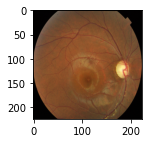

In [41]:
predict_image(r"E:\DS workspace\ML DL Python\aca tor dataset\1000 images eye - Medical\Dataset\1000images\10.1.Optic atrophy\202efd23-8d87-11e8-9daf-6045cb817f5b..JPG")